# param_estim_3lump.py

Created on Fri Oct 19 15:04:55 2018
@author: Matthew Brooks

This program uses initial data and parameter estimation to solve a system 
differential equations and plot a best fit curve for the conversion of 
VGO into gasoline, gas, and coke. These substances are split into three 
lumps: VGO, gasoline, Gas+Coke. The yield of each of these lumps is
plotted agianst both the time of the reaction in hours and the percent
conversion. The parameters are estimated using a given table of yields at
different times.

$k_i =$ Rate constant of the reaction

$y_1 =$ Yield of VGO

$y_2 =$ Yield of Gasoline

$y_3 =$ Yield of Coke + Gas

$\frac{dy_1}{dt} = -(k_1+k_3)*y_1^2$

$\frac{dy_2}{dt} = k_1*y_1^2-k_2*y_2$

$\frac{dy_3}{dt} = k_3*y_1^2+k_2*y_2$

In [27]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Data used to estimate parameters

In [4]:
# Time
xaxisData = np.array( [0, 1/60, 1/30, 1/20, 1/10] )

# Yield of y_1; y_2; y_3 at given times of xdata
yaxisData = np.array( [ [1, .5074, .3796, .2882, .1762], [0, .3767, .4385, .4865, .5416], [0, .1159, .1819, .2253, .2822] ] )

Guesses for parameters

In [6]:
k_1guess = 1;
k_2guess = 1;
k_3guess = 1;
parameterGuesses = np.array([k_1guess, k_2guess, k_3guess])

Define system of ODEs

In [8]:
def ODE_definition(y,t,args): 
    y1 = y[0]
    y2 = y[1]
    y3 = y[2]
    k_1 = args[0]
    k_2 = args[1]
    k_3 = args[2]
    dy1dt = -(k_1+k_3)*(y1**2)
    dy2dt = (k_1*(y1**2))-(k_2*y2)
    dy3dt = (k_3*(y1**2))+(k_2*y2)
    return dy1dt, dy2dt, dy3dt

Define model for system of ODEs to be solved

In [10]:
def ODEmodel(xaxisData,*params):
    
    #Initial condition
    yaxis0 = np.array([1,0,0])
    numYaxisVariables = 3 
    yaxisOutput = np.zeros((xaxisData.size,numYaxisVariables)) 
    for i in np.arange(0,len(xaxisData)):
        xaxisIncrement = 0.0001 
        xaxisSpan = np.arange(0,xaxisData[i]+xaxisIncrement,xaxisIncrement)
        y_calc = odeint(ODE_definition,yaxis0,xaxisSpan,args=(params,)) 
        yaxisOutput[i,:]=y_calc[-1,:]
    yaxisOutput = np.transpose(yaxisOutput)
    yaxisOutput = np.ravel(yaxisOutput)
    return yaxisOutput

Estimate parameters

In [12]:
parametersoln, pcov = curve_fit(ODEmodel,xaxisData,np.ravel(yaxisData),p0=parameterGuesses)

Plot yield vs time graph

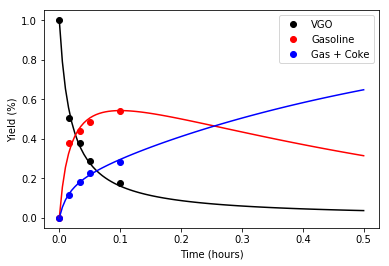

In [24]:
plt.plot(xaxisData, yaxisData[0,:],'ko') 
plt.plot(xaxisData, yaxisData[1,:],'ro')
plt.plot(xaxisData, yaxisData[2,:],'bo')
yaxis0 = np.array([1,0,0])
numYaxisVariables = 3

xforPlotting = np.linspace(0,xaxisData[-1]+.4,100) 
y_calculated = ODEmodel(xforPlotting,*parametersoln)

#reshape for plotting
y_calculated = np.reshape(y_calculated,(numYaxisVariables,xforPlotting.size))
plt.plot(xforPlotting, y_calculated[0,:],'k-') 
plt.plot(xforPlotting, y_calculated[1,:],'r-') 
plt.plot(xforPlotting, y_calculated[2,:],'b-') 
plt.xlabel('Time (hours)')
plt.ylabel('Yield (%)')
plt.legend(['VGO','Gasoline','Gas + Coke'])
plt.show()

Figure 1: Graph of the Yield of the substances over time.

Plot yield vs conversion graph

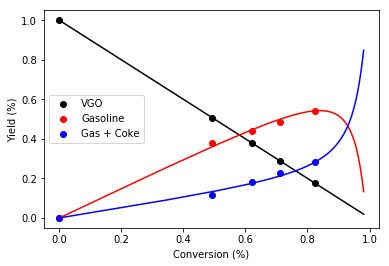

In [25]:
plt.plot(1-yaxisData[0,:], yaxisData[0,:],'ko') 
plt.plot(1-yaxisData[0,:], yaxisData[1,:],'ro')
plt.plot(1-yaxisData[0,:], yaxisData[2,:],'bo')

xforPlottingconversion = np.linspace(0,1,100) 
y_calculatedconversion = ODEmodel(xforPlottingconversion,*parametersoln)

#reshape for plotting
y_calculatedconversion = np.reshape(y_calculatedconversion,(numYaxisVariables,xforPlottingconversion.size))
plt.plot(1-y_calculatedconversion[0,:], y_calculatedconversion[0,:],'k-')
plt.plot(1-y_calculatedconversion[0,:], y_calculatedconversion[1,:],'r-') 
plt.plot(1-y_calculatedconversion[0,:], y_calculatedconversion[2,:],'b-') 
plt.xlabel('Conversion (%)')
plt.ylabel('Yield (%)')
plt.legend(['VGO','Gasoline','Gas + Coke'])
plt.show()

Figure 2: Graph of the Yield of the substances vs the conversion of VGO

output results

In [20]:
k = np.array(parametersoln)

print('k_1 = ', k[0])
print('k_2 = ', k[1])
print('k_3 = ', k[2])
print('pcov = ', pcov)

k_1 =  38.80119695287071
k_2 =  1.8454896116716306
k_3 =  13.203448937737644
pcov =  [[ 2.21238548  0.36818226 -0.26290315]
 [ 0.36818226  0.26869312 -0.47711242]
 [-0.26290315 -0.47711242  1.39313395]]
